## Predicting Customer Churn

<hr style=\ "border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

### Necessary Imports
<hr style=\ "border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

In [24]:
import numpy as np
import pandas as pd
import scipy.stats as stats

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#For modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Custom modules
import acquire
import prepare
import explore


### Project Planning

<hr style=\ "border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

* Create README.md with data dictionary, project and business goals, come up with initial hypotheses.
* Acquire data from the Codeup Database and create a function to automate this process. Save the function in an acquire.py file to import into the Final Report Notebook.
* Clean and prepare data for the first iteration through the pipeline, MVP preparation. Create a function to prepare data with encoding for modeling, and another function to prepare data without encoding for exploration. Store the functions in a prepare.py module, and prepare data in Final Report Notebook by importing and using the function.
*  Clearly define at least two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
* Establish a baseline accuracy and document well.
* Train three different classification models.
* Evaluate models on train and validate datasets.
* Choose the model with that performs the best and evaluate that single model on the test dataset.
* Create csv file with the measurement id, the probability of the target values, and the model's prediction for each observation in my test dataset.
* Document conclusions, takeaways, and next steps in the Final Report Notebook.

### Executive Summary
<hr style=\ "border-bottom: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

* My finding will go here.

### Acquire Data
<hr style=\ "border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

|Target|Datatype|Definition|
|:-------|:---------|:------------|
| Churn | Object | Whether the customer churned or not (Yes or No) |

|Feature|Datatype|Definition|
|:-------|:---------|:------------|
| customer_id | Object | Customer ID |
| gender | Object | Whether the customer is a male or a female |
| senior_citizen | int64 | Whether the customer is a senior citizen or not (1, 0) |
| partner | Object | Whether the customer has a partner or not (Yes, No) |
| dependents | Object | Whether the customer has dependents or not (Yes, No) |
| tenure | int64 | Number of months the customer has stayed with the company |
| phone_service | Object | Whether the customer has a phone service or not (Yes, No) |
| multiple_lines | Object | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| online_security | Object | Whether the customer has online security or not (Yes, No, No internet service) |
| online_backup | Object | Whether the customer has online backup or not (Yes, No, No internet service) |
| device_protection | Object | Whether the customer has device protection or not (Yes, No, No internet service) |
| tech_support | Object | Whether the customer has tech support or not (Yes, No, No internet service) |
| streaming_tv | Object | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| streaming_movies | Object | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| paperless_billing | Object | Whether the customer has paperless billing or not (Yes, No) |
| monthly_charges | float64 | The amount charged to the customer monthly |
| total_charges | Object | The total amount charged to the customer |
| contract_type | Object | The contract term of the customer (Month-to-month, One year, Two year) |
| internet_service_type | Object | Customer’s internet service provider (DSL, Fiber optic, No) |
| payment_type | Object | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |

In [2]:
#Load the telco customer data into a pandas dataframe
telco = acquire.get_telco_data()

In [3]:
#Get a quick look at the data
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   gender                      7043 non-null   object 
 2   senior_citizen              7043 non-null   int64  
 3   partner                     7043 non-null   object 
 4   dependents                  7043 non-null   object 
 5   tenure                      7043 non-null   int64  
 6   phone_service               7043 non-null   object 
 7   multiple_lines              7043 non-null   object 
 8   internet_service_type_id    7043 non-null   int64  
 9   online_security             7043 non-null   object 
 10  online_backup               7043 non-null   object 
 11  device_protection           7043 non-null   object 
 12  tech_support                7043 non-null   object 
 13  streaming_tv                7043 

In [4]:
telco.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,contract_type_id.1,internet_service_type_id.1,payment_type_id.1
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692,1.690473,1.872923,2.315633
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047,0.833755,0.737796,1.148907
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,1.000000,1.000000,1.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,1.000000,1.000000,1.000000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1.000000,2.000000,2.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,2.000000,2.000000,3.000000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,3.000000,3.000000,4.000000


In [5]:
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,internet_service_type_id.1,internet_service_type,payment_type_id.1,payment_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,2,90.45,5957.9,No,3,Two year,1,DSL,2,Mailed check
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,4,45.20,2460.55,No,3,Two year,1,DSL,4,Credit card (automatic)
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,3,45.05,2560.1,No,3,Two year,1,DSL,3,Bank transfer (automatic)
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,4,39.40,825.4,No,3,Two year,1,DSL,4,Credit card (automatic)
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,3,85.15,6316.2,No,3,Two year,1,DSL,3,Bank transfer (automatic)


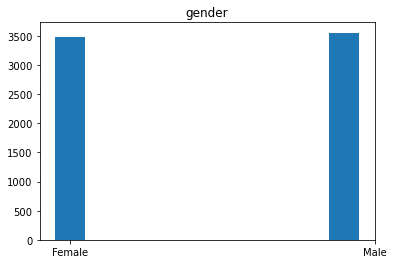

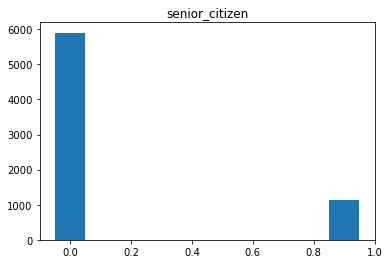

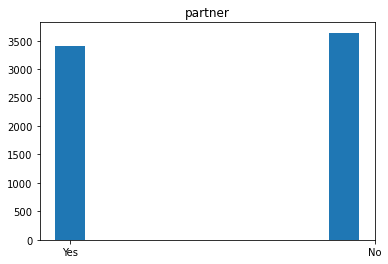

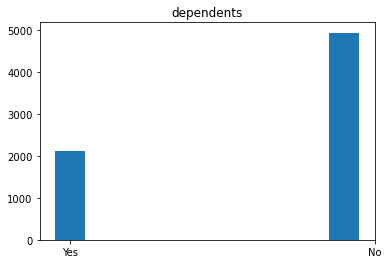

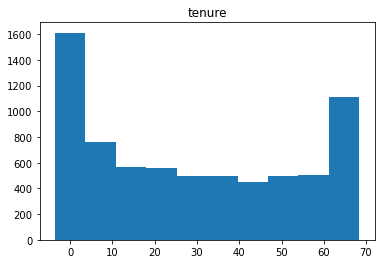

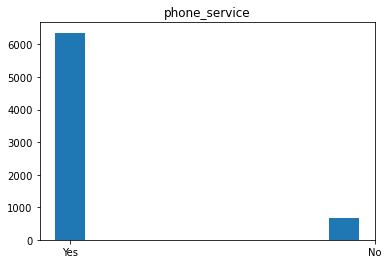

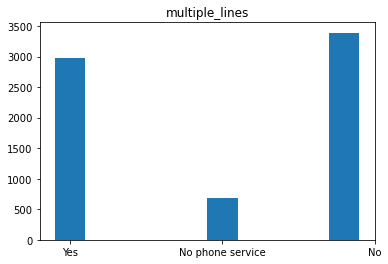

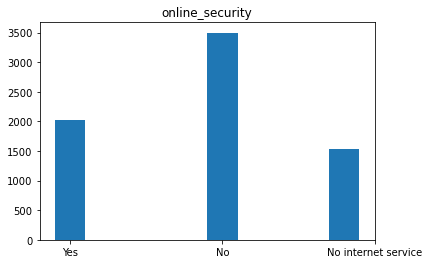

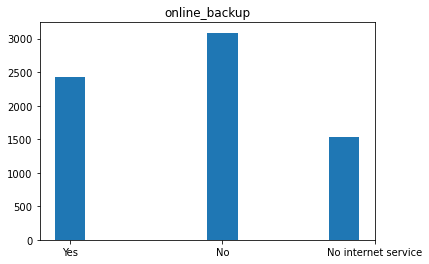

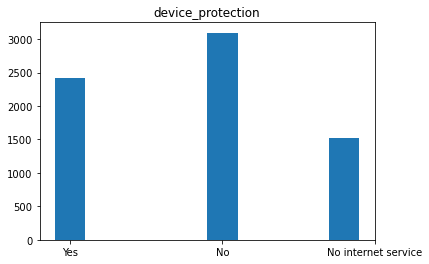

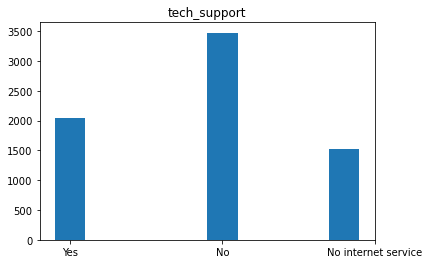

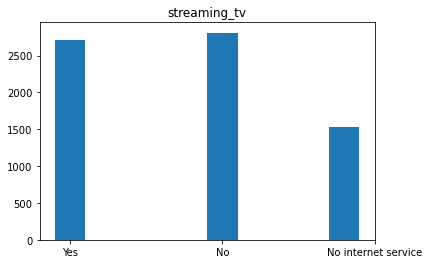

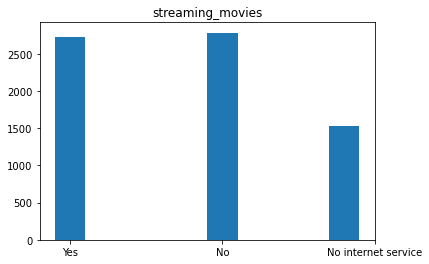

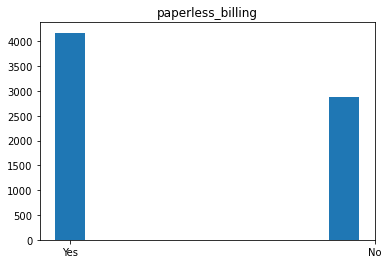

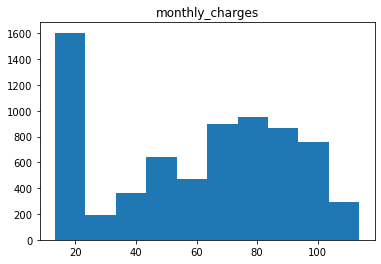

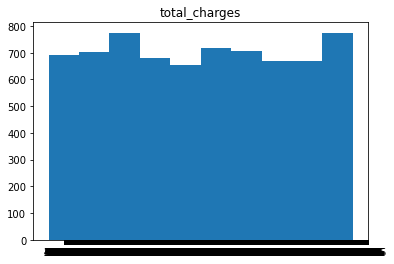

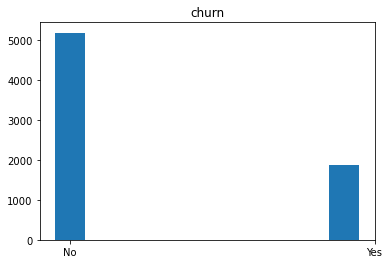

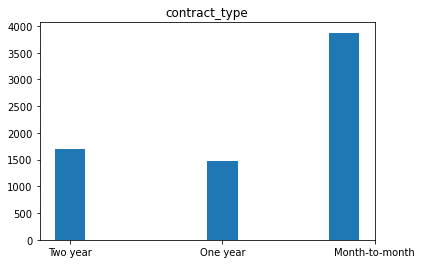

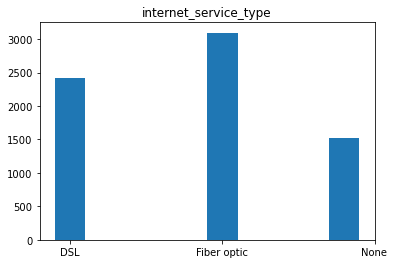

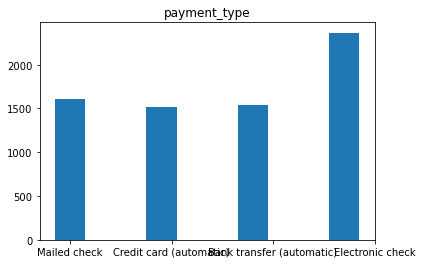

In [6]:
#Show initial distributions
acquire.show_dists(telco)

#### Key Takeaways:
* There are 7043 entries with 27 columns in the original data.
* The average tenure is about 32 months with a minimum entry of 0 months and a maximum entry of 72 months.
* The average monthly charge is about 65 with a minimum of about 18 and a maximum of about 119.
* Most customers are on a month to month contract.
* Most customers pay using Electronic Check (manual)
* Most customers have fiber optic internet service.

* Total charges was loaded in as a string and will need to be transformed in the prepare stage. 
* There are multiple 'id' columns that can be dropped in the prepare stage.

### Prepare Data
<hr style=\ "border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

In [9]:
#Prepare and split unencoded data for the explore stage:
train_explore, validate_explore, test_explore = prepare.prep_without_encoding(telco)

print(f'train -> {train_explore.shape}')
print(f'validate -> {validate_explore.shape}')
print(f'test -> {test_explore.shape}')

train -> (3937, 20)
validate -> (1688, 20)
test -> (1407, 20)


In [10]:
#Prepare and split encoded data for the modeling stage:
train, validate, test = prepare.prep_with_encoding(telco)

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3937, 31)
validate -> (1688, 31)
test -> (1407, 31)


#### Key Takeaways:
* Dropped duplicates.
* Dropped rows where tenure was zero.
* Transformed 'total_charges' to float data type.
* Stripped all leading and trailing whitespaces from each categorical column.
* Dropped all 'id' columns.

#### Prepared two different sets of data:
* One set for exploration which does not contain encoded variables and where all categorical variables are easy to read strings.
* Another set for modeling that contains encoded variables and where all 'object' datatype columns were dropped.

### Explore Data
<hr style=\ "border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

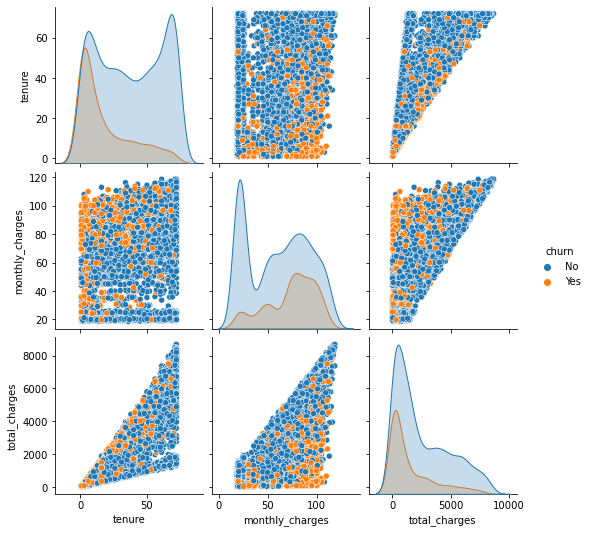

In [13]:
#Visualize the data
sns.pairplot(train_explore, hue = 'churn')
plt.show()

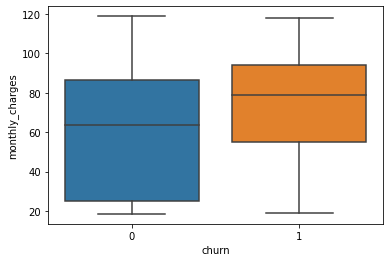

In [14]:
sns.boxplot(y = 'monthly_charges', x = 'churn', data = train)
plt.show()

#### Key Takeaways:
* It appears that most of the churned customers churn early on in tenure.
* It also appears that most churned customers had higher monthly_charges early on in tenure.
* Monthly charges appear to be higher for customers that churned compared to those that did not.
* The interquartile range for non-churned customers is much larger than that of churned customers.
* The median monthly_charges for churned customers is about 80
* The median monthly_charges for non-churned customers is about 65

### Statistical Testing

#### Hypothesis 1
$H_0$: Contract type is independent of customer churn.
    
$H_a$: Contract type is not independent of customer churn.

In [15]:
alpha = 0.05

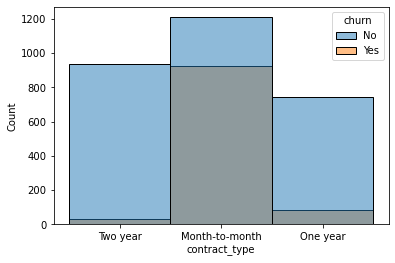

In [17]:
#Visualize the data.
sns.histplot(x = 'contract_type', hue= 'churn', data = train_explore)
plt.show()

In [19]:
#chi-squared test
observed = pd.crosstab(train_explore.contract_type, train_explore.churn)
observed

churn,No,Yes
contract_type,,
Month-to-month,1209,926
One year,744,86
Two year,938,34


In [20]:
chi2, p, df, expected = stats.chi2_contingency(observed)
chi2, p

(685.9292239718707, 1.128136177109916e-149)

In [21]:
#is p < alpha
p < alpha

True

Since p is less than alpha, we reject the null hypothesis.
<hr style=\ "border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

#### Hypothesis 2:
$H_0$: The average number of customers that churn with a monthly contract <= the average number of customers that churn without a monthly contract.

$H_a$: The average number of customers that churn with a monthly contract > the average number of customers that churn without a monthly contract.

In [22]:
alpha = 0.05

In [33]:
#comparing the means of two sub-populations, so use independent t-test (one-tailed)
#Get the sub-groups
x1 = train_explore[train_explore.contract_type == 'Month-to-month'].copy()
x2 = train_explore[train_explore.contract_type != 'Month-to-month'].copy()

In [34]:
#Convert 'yes' and 'no' to integers
x1.churn = x1.churn.apply(explore.convert_to_ints)
x2.churn = x2.churn.apply(explore.convert_to_ints)

In [37]:
t, p = stats.ttest_ind(x1.churn, x2.churn)
t, p

(28.5383263446191, 5.589136377823954e-163)

In [38]:
#Is p < alpha and is t positive?
p < alpha, t > 0

(True, True)

Since p is less than alpha and t is positive, we reject the null hypothesis.

#### Key Takeaways:
* Customer churn is not independent of contract type.
* Customers on a month-to-month contract churn significantly more than customers not on a month-to-month contract.
* Contract type will be a good feature for modeling.

#### Hypothesis 3:
$H_0$: Internet service type is independent of customer churn.
    
$H_a$: Internet service type is not independent of customer churn.

In [40]:
alpha = 0.05

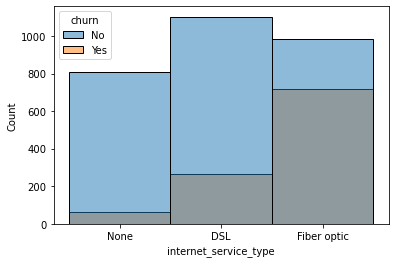

In [42]:
#Visualize the data.
sns.histplot(x = 'internet_service_type', hue = 'churn', data = train_explore)
plt.show()

In [44]:
#chi2 test
observed = pd.crosstab(train_explore.internet_service_type, train_explore.churn)
observed

churn,No,Yes
internet_service_type,,
DSL,1102,266
Fiber optic,982,716
None,807,64


In [45]:
chi2, p, df, expected = stats.chi2_contingency(observed)
p

2.9661345192527194e-90

In [46]:
#Is p < alpha?
p < alpha

True

Since p is less than alpha, we reject the null hypothesis.
<hr style=\ "border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

#### Hypothesis 4:
$H_0$: The average number of customers that churn with fiber optic internet <= the average number of customers that churn without fiber optic internet.

$H_a$: The average number of customers that churn with fiber optic internet > the average number of customers that churn without fiber optic internet.

In [47]:
alpha = 0.05

In [51]:
#comparing the means of two sub-populations, so use independent t-test (one-tailed)
#Get sub groups
x1 = train_explore[train_explore.internet_service_type == 'Fiber optic'].copy()
x2 = train_explore[train_explore.internet_service_type != 'Fiber optic'].copy()

In [52]:
#Convert 'yes' and 'no' to ints
x1.churn = x1.churn.apply(explore.convert_to_ints)
x2.churn = x2.churn.apply(explore.convert_to_ints)

In [54]:
t, p = stats.ttest_ind(x1.churn, x2.churn)
t, p

(20.274812199904243, 5.180264455192516e-87)

In [55]:
#Is p < alpha and is t > 0?
p < alpha, t > 0

(True, True)

Since p is less than alpha and t is positive, we reject the null hypothesis.

#### Key Takeaways:
* Customer churn is not independent of internet service type.
* Customers with fiber optic internet churn significantly more than those without fiber optic internet.
* Internet service type will be a good feature for modeling.

#### Hypothesis 5:
$H_0$: Payment type is independent of customer churn.
    
$H_a$: Payment type is not independent of customer churn.

In [57]:
alpha = 0.05

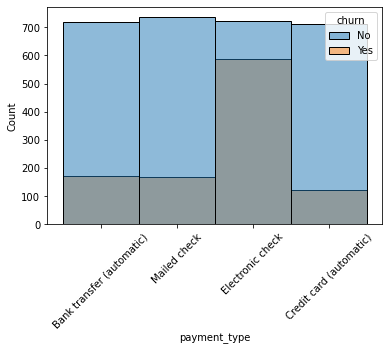

In [59]:
#Visualize the data.
sns.histplot(x = 'payment_type', hue = 'churn', data = train_explore)
plt.xticks(rotation = 45)
plt.show()

In [60]:
observed = pd.crosstab(train_explore.payment_type, train_explore.churn)
observed

churn,No,Yes
payment_type,,
Bank transfer (automatic),719,170
Credit card (automatic),712,122
Electronic check,723,588
Mailed check,737,166


In [61]:
chi2, p, df, expected = stats.chi2_contingency(observed)
p

8.748945233390548e-74

In [62]:
#Is p < alpha?
p < alpha

True

Since p is less than alpha, we reject the null hypothesis.
<hr style=\ "border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

#### Hypothesis 6:
$H_0$: The average number of customers that churn with electronic check payments <= the average number of customers that churn with other types of payments.

$H_a$: The average number of customers that churn with electronic check payments > the average number of customers that churn with other types of payments.

In [65]:
#comparing the means of two sub-populations, so use independent t-test (one-tailed)
#Get sub groups
x1 = train_explore[train_explore.payment_type == 'Electronic check'].copy()
x2 = train_explore[train_explore.payment_type != 'Electronic check'].copy()

In [67]:
#Convert 'yes' and 'no' to ints
x1.churn = x1.churn.apply(explore.convert_to_ints)
x2.churn = x2.churn.apply(explore.convert_to_ints)

In [68]:
t, p = stats.ttest_ind(x1.churn, x2.churn)
t, p

(19.18497391231612, 1.7111482018894452e-78)

In [69]:
#Is p < alpha and is t > 0?
p < alpha, t > 0

(True, True)

Since p is less than alpha and t is positive, we reject the null hypothesis.

#### Key Takeaways:
* Customer churn is not independent of payment type.
* Customers with electronic check payments churn significantly more than customers with other payment types.
* Payment type will be a good feature for modeling.

### Model and Evaluate
<hr style=\ "border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>